In [ ]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# set up system of equations
def system_of_equations(t, u):
    u1, u2, u3, u4 = u   # x, x', y, y'

    r2 = u1*u1 + u3*u3
    r = np.sqrt(r2)
    r3 = r2 * r if r != 0 else np.inf

    f1 = -u1 / r3      # this is u2'
    f2 = -u3 / r3      # this is u4'

    return [u2, f1, u4, f2]


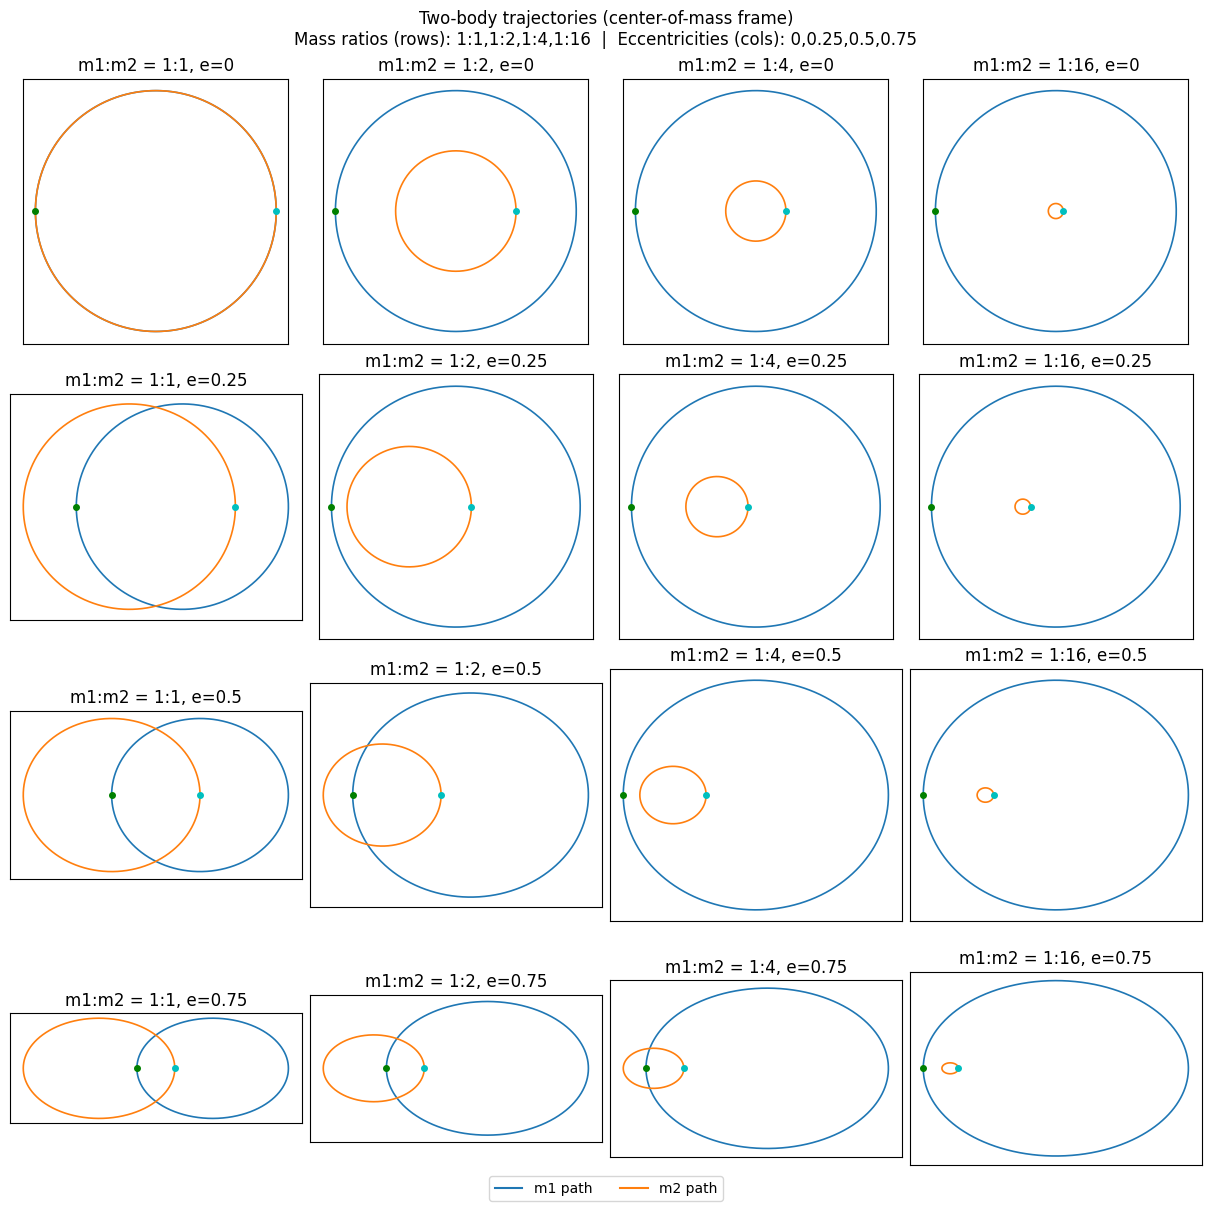

In [ ]:
e_list = [0, 0.25, 0.5, 0.75]
m2_list = [1, 2, 4, 16]
m1 = 1

fig, axes = plt.subplots(4, 4, figsize=(12,12), constrained_layout=True)
fig.suptitle('Two-body trajectories (center-of-mass frame)\nMass ratios (rows): 1:1,1:2,1:4,1:16  |  Eccentricities (cols): 0,0.25,0.5,0.75', fontsize=12)
for i, e in enumerate(e_list):
  for j, m2 in enumerate(m2_list):
      ax = axes[i, j]

      # set up inital conditions
      T = (2*np.pi)/(1-e)**(3/2)
      M  = m1 + m2

      x0 = -1.0
      y0 = 0.0
      vx0 = 0.0
      vy0 = np.sqrt(1.0 + e)

      # get first order values)
      u = [x0, vx0, y0, vy0]
      t_span = (0, T)
      t_eval = np.linspace(0, T, 1000)

      # solve first order equations
      sol = solve_ivp(
      system_of_equations,
      t_span,
      u,
      t_eval=t_eval,
      rtol=1e-9,
      atol=1e-12
      )

      # get values
      x, vx, y, vy = sol.y
      r = np.vstack((x, y))

      r1 = (m2 / M) * r
      r2 = -(m1 / M) * r

      # plot trajectories
      ax.plot(r1[0], r1[1], '-', linewidth=1.2, label=f'm1 path')
      ax.plot(r2[0], r2[1], '-', linewidth=1.2, label=f'm2 path')
      # mark starting positions
      ax.plot(r1[0,0], r1[1,0], 'go', markersize=4)
      ax.plot(r2[0,0], r2[1,0], 'co', markersize=4)
      ax.set_aspect('equal', 'box')

      # labels and minor decorations
      ax.set_title(f'm1:m2 = {m1}:{m2}, e={e}')
      ax.set_xticks([])
      ax.set_yticks([])

# shared legend (one per figure)
lines = [plt.Line2D([0],[0], color='C0'), plt.Line2D([0],[0], color='C1')]
fig.legend(lines, ['m1 path', 'm2 path'], loc='lower center', ncol=2)

plt.show()